# 變異數分析
### 黃孟婷
---

# 單因子變異數分析
變異數分析是 t-test 的延伸，用來比較兩類以上的平均值。這裡將當作解釋變數的類別變數稱作因子 (factor)，而數值變量則是反應變數。

## 總變異公式


在分組的資料中，我們會把資料的總變異 (total variation, $SS_{total}$
) 拆解成兩個部分，<br>
一個稱作組間變異 (between-groups variation, $SS_B$
)，另一個稱作組內變異 (within-groups variation, $SS_W$
)。

$$SS_B \;=\; \sum^k_{i=1} \;n_i\;(\bar {y_i} - \bar y)^2$$
$$SS_W \;=\; \sum^k_{i=1} \sum^{n_i}_{j=1} \;(y_{ij} - \bar {y_i})^2$$
$$SS_{total} \;=\; \sum^k_{i=1} \sum^{n_i}_{j=1} \; (y_{ij} - \bar {y})^2$$

其中 $k$ 是全部的群數。

## 假設檢定


如果我們想知道各組 (以 $k = 4$ 為例) 的平均數是否相同時，將考慮以下的假設檢定：<br>

$H_0 : \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu$

$H_A : 至少有一組的平均數不等於整體平均數 (\mu)$

而用來檢定虛無假設的檢定統計量為 :

$$f = \frac{SS_B \;/\;(k−1)}{SS_W \;/\; (n−k)}$$

$n \;是整體的樣本數，k \;是群的數目。$<br>

$在虛無假設成立（且後面敘述的三點假設符合）時，f \;統計量為\; F \;分佈\; (df_1 = k−1,\; df_2 = n−k)$<br>
由於這個 $f$ 統計量的分子是組間變異，分母是組內的變異，故當 $f$ 很大時，
我們認為有足夠的證據指出，各組間的平均數至少有一個和整體的平均數不相等。

想要正確應用以上的檢定，需要以下三點假設 :
1. 同群體內的樣本是獨立同分配 (iid)
2. 各樣本滿足常態假設 （若無明顯離群值，常態的假設不那麼重要）
3. 各群的母體變異數假設相等

## 分析舉例
```
以下我們以 Cushings 資料作介紹 ：

該資料討論庫欣氏症 (Cushing’s syndrome) 的診斷檢查。
這是一種與腎上腺過度分泌皮質醇有關的高血壓疾病。
觀察紀錄是兩種類固醇代謝物的尿排泄率。資料包含 27 個觀測對象 3 個變數，
其中 Type 變量顯示綜合症的基礎類型，包含以下四種：腺瘤(a)、雙側增生(b)、癌症(c)和未知(u)。
```

## 讀取資料


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import DescrStatsW
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

In [2]:
Cushings = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\12_變異數分析\Cushings.csv")
Cushings = Cushings.set_index('Unnamed: 0')
Cushings

,Tetrahydrocortisone,Pregnanetriol,Type
Unnamed: 0,,,
a1,3.1,11.70,a
a2,3.0,1.30,a
a3,1.9,0.10,a
a4,3.8,0.04,a
a5,4.1,1.10,a
a6,1.9,0.40,a
b1,8.3,1.00,b
b2,3.8,0.20,b
b3,3.9,0.60,b


若有發現離群值 (outlier) 需移除，可透過以下步驟，例如在 Tetrahydrocortisone 中，異常值的地方落在「c4」

In [3]:
Cushings = Cushings.drop('c4')
Cushings

,Tetrahydrocortisone,Pregnanetriol,Type
Unnamed: 0,,,
a1,3.1,11.70,a
a2,3.0,1.30,a
a3,1.9,0.10,a
a4,3.8,0.04,a
a5,4.1,1.10,a
a6,1.9,0.40,a
b1,8.3,1.00,b
b2,3.8,0.20,b
b3,3.9,0.60,b


但要注意的是，我們最好確定紀錄是有錯誤記錄且不能恢復時，才考慮將離群值 / 異常值刪除 ！

## 基礎統計摘要(Summary)
先看一下各組的簡單摘要，以 Type 作為分群：

+ Tetrahydrocortisone 基礎統計量

In [4]:
statistics = Cushings.groupby('Type')['Tetrahydrocortisone'].describe()
statistics

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
a,6.0,2.966667,0.924482,1.9,2.175,3.05,3.625,4.1
b,10.0,8.180000,3.789107,3.8,5.900,7.75,8.900,15.4
c,4.0,11.200000,3.094080,9.2,9.500,9.90,11.600,15.8
u,6.0,14.016667,10.095824,2.6,7.050,12.95,18.625,30.0


+ Pregnanetriol 基礎統計量

In [5]:
statistics = Cushings.groupby('Type')['Pregnanetriol'].describe()
statistics

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
a,6.0,2.44,4.565961,0.04,0.175,0.75,1.250,11.7
b,10.0,1.12,1.003106,0.20,0.450,0.80,1.500,3.6
c,4.0,6.25,2.197726,3.10,5.575,7.00,7.675,7.9
u,6.0,1.20,1.887856,0.10,0.175,0.60,0.800,5.0


## F 分佈機率函數
+ 繪製 F 分佈圖
+ 分子自由度 4 - 1 = 3
+ 分母自由度 (6-1) + (10-1) + (4-1) + (6-1) = 22

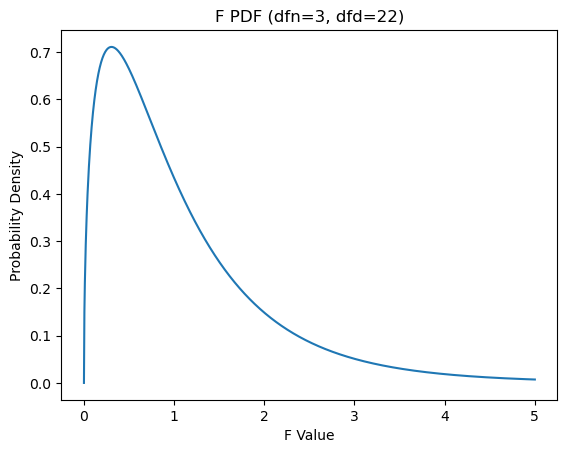

In [6]:
# import scipy.stats as stats

dfn = 3   # 分子自由度
dfd = 22  # 分母自由度

# F分佈的機率密度函數（PDF）
x = np.linspace(0, 5, 1000)
f_dist = stats.f(dfn, dfd)  # 創建一個 F分佈對象
y = f_dist.pdf(x)           # 計算在給定 x值處的概率密度

plt.plot(x, y)
plt.title(f"F PDF (dfn={dfn}, dfd={dfd})")
plt.xlabel("F Value")
plt.ylabel("Probability Density")
plt.show()

$p-value = P(F≥f)$ 需計算大於觀察到的檢定統計量 $(f)$ 的機率，以下假設 $f = 3.2$。

+ 自由度為 3 和 22 的 F 分佈中小於給定值的**右尾**機率（p-value）

In [7]:
f = 3.2                                 # 給定的值
p_value = stats.f.sf(f, dfn, dfd)       # sf 即 "survival function"來計算右尾機率
print("右尾機率（p-value）: ", p_value)

右尾機率（p-value）:  0.04322893689324103


## 平均數檢定

我們要檢定每組的平均數是否相等，在這個例子中，就是了解 Tetrahydrocortisone 的排泄率會不會受到 Type 的類別不同而影響。

### 單因子變異數分析 (One-way ANOVA)
+ 群組 : Type
+ 變數 : Tetrahydrocortisone
+ [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
+ [statsmodels.stats.anova.anova_lm](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)
+ [anova_lm() 中 type 的使用](https://stackoverflow.com/questions/55175274/uses-of-typ-in-anova-lm)

In [8]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# 跟 R 寫法類似
model = ols('Tetrahydrocortisone ~ Type', data=Cushings).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Type,394.328872,3.0,4.304232,0.015615
Residual,671.837667,22.0,NaN,NaN


+ [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [9]:
# import scipy.stats as stats

f_statistic, p_value = stats.f_oneway(*Cushings.groupby('Type')['Tetrahydrocortisone'].agg(list))

print("統計量：", f_statistic)
print("P 值：", p_value)

統計量： 4.304231815665381
P 值： 0.015614931262048711


+ \* 操作符展開列表
+ groupby() 之後的方括號中選擇了 'Tetrahydrocortisone' 列，並使用 agg() 將每個組的數據聚合為列表


In [10]:
Cushings.groupby('Type')['Tetrahydrocortisone'].agg(list)

Type
a                       [3.1, 3.0, 1.9, 3.8, 4.1, 1.9]
b    [8.3, 3.8, 3.9, 7.8, 9.1, 15.4, 7.7, 6.5, 5.7,...
c                               [10.2, 9.2, 9.6, 15.8]
u                   [5.1, 12.9, 13.0, 2.6, 30.0, 20.5]
Name: Tetrahydrocortisone, dtype: object

In [11]:
group_means = Cushings.groupby('Type')['Tetrahydrocortisone'].mean()
group_std = Cushings.groupby('Type')['Tetrahydrocortisone'].std()

print("各組均值：")
print(group_means)
print("\n各組標準差：")
print(group_std)

各組均值：
Type
a     2.966667
b     8.180000
c    11.200000
u    14.016667
Name: Tetrahydrocortisone, dtype: float64

各組標準差：
Type
a     0.924482
b     3.789107
c     3.094080
u    10.095824
Name: Tetrahydrocortisone, dtype: float64


## 成對比較與繪圖
除了知道各群平均是否有差異之外，我們還想知道是哪幾群明顯跟大家不同。

+ Tetrahydrocortisone 的各組平均落在 95% 信賴區間的結果

#### 各組平均 95% 信賴區間

In [12]:
# from statsmodels.stats.weightstats import DescrStatsW

group_ci = Cushings.groupby('Type')['Tetrahydrocortisone'].apply(lambda x: DescrStatsW(x).tconfint_mean())
group_ci

Type
a     (1.9964824782698627, 3.93685085506347)
b     (5.469436000838449, 10.89056399916155)
c    (6.276627679811145, 16.123372320188853)
u    (3.4217489127930723, 24.61158442054026)
Name: Tetrahydrocortisone, dtype: object

+ apply() 將每個組的數據傳遞給 DescrStatsW 類，創建一個描述性統計對象
+ tconfint_mean() 計算每個組均值的信賴區間
+ 注意，這裡的信賴區間是使用 t 分佈計算得到的

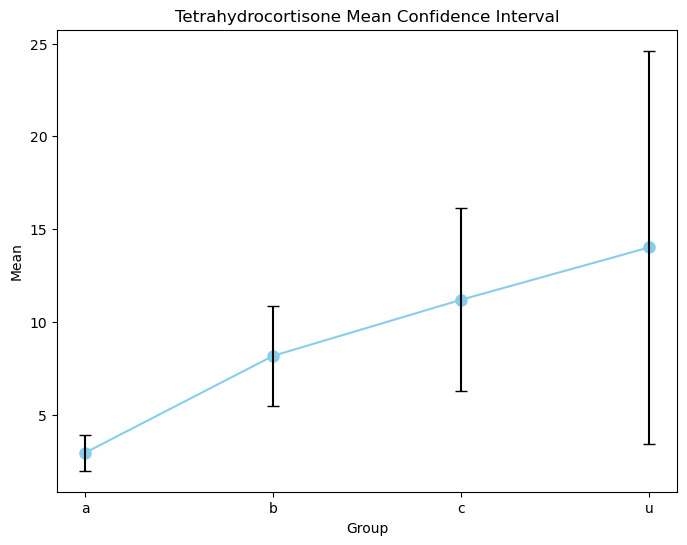

In [13]:
plt.figure(figsize=(8, 6))

x = np.arange(len(group_ci))

# plot() 繪製平均值的折線
plt.plot(x, group_ci.apply(lambda x: (x[0]+x[1])/2), marker='o', markersize=8, color='skyblue')

# errorbar() 繪製誤差線，表示平均值的 95% 信賴區間
plt.errorbar(x, group_ci.apply(lambda x: (x[0]+x[1])/2), yerr=group_ci.apply(lambda x: x[1]-x[0])/2, linestyle='', capsize=4, color='black')

plt.xticks(x, group_ci.index)
plt.title("Tetrahydrocortisone Mean Confidence Interval")
plt.xlabel("Group")
plt.ylabel("Mean")
plt.show()

+ **注意 : 這裡直接做兩兩比較是有問題的，當組數多的時候需要考慮多個檢定的整體型一錯誤**

### 單因子變異數分析 (One-way ANOVA)，平均數成對比較

可以使用事後多重比較方法，例如 Tukey's HSD （Honestly Significant Difference）或 Bonferroni 校正。<br>
這些方法可以用於比較不同組之間的平均值是否存在顯著差異。

+ 使用 Tukey's HSD 方法
+ [statsmodels.stats.multicomp.pairwise_tukeyhsd](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

In [14]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 跟 R 寫法類似
model = ols('Tetrahydrocortisone ~ Type', data=Cushings).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Tukey's HSD
pairwise_results = pairwise_tukeyhsd(Cushings['Tetrahydrocortisone'], Cushings['Type'])

print("方差分析結果：")
print(anova_table)
print("\n成對比較結果：")
print(pairwise_results)

方差分析結果：
              sum_sq    df         F    PR(>F)
Type      394.328872   3.0  4.304232  0.015615
Residual  671.837667  22.0       NaN       NaN

成對比較結果：
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   5.2133 0.2879 -2.7109 13.1375  False
     a      c   8.2333 0.1267 -1.6719 18.1386  False
     a      u    11.05  0.011  2.1905 19.9095   True
     b      c     3.02 0.7925 -6.0583 12.0983  False
     b      u   5.8367 0.2023 -2.0875 13.7609  False
     c      u   2.8167 0.8584 -7.0886 12.7219  False
----------------------------------------------------


注意這個表跟前面的平均數圖有非常不同的結論，前面 a-b 和 a-u 明顯不同，但此處卻只有 a-u 不同。

+ 使用 Bonferroni 校正
+ [statsmodels.stats.multitest.multipletests](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

In [15]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multitest import multipletests

# 成對比較
pairwise_results = pairwise_tukeyhsd(Cushings['Tetrahydrocortisone'], Cushings['Type'])

# 使用 Bonferroni 校正
p_adjusted = multipletests(pairwise_results.pvalues, method='bonferroni')[1]
p_reject = multipletests(pairwise_results.pvalues, method='bonferroni')[0]

# 創建一個新的結果 DataFrame，並將校正後的 p 值插入其中
results_df = pd.DataFrame(pairwise_results._results_table.data[1:7], columns=pairwise_results._results_table.data[0])
results_df['p-adj'] = p_adjusted
results_df['reject'] = p_reject
results_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,a,b,5.2133,1.000000,-2.7109,13.1375,False
1,a,c,8.2333,0.760202,-1.6719,18.1386,False
2,a,u,11.0500,0.066031,2.1905,19.9095,False
3,b,c,3.0200,1.000000,-6.0583,12.0983,False
4,b,u,5.8367,1.000000,-2.0875,13.7609,False
5,c,u,2.8167,1.000000,-7.0886,12.7219,False


注意這個表跟前面的平均數圖有非常不同的結論，前面 a-b 和 a-u 明顯不同，但此處卻沒有一個不同。<br>
原因在於這個資料的各組變異數相差極大，此處平均數成對比較是根據相同變異數假設所作的結果，自然不可靠。

## 假設不符合時的替代檢定
前面 Cushings 資料看起來不滿足變異數相等的假設，以下我們介紹一種無母數的方法。<br>
Kruskal-Wallis test 常被用在當資料樣本數較小時 (通常以各組樣本筆數 < 10 為標準)，<br>
或是當資料中包含多組樣本 (三組以上之樣本)，目標是判斷多組樣本間母體中位數是否有差異。
+ [Kruskal-Wallis 單向方差分析](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)
+ [scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

In [16]:
result = stats.kruskal(*Cushings.groupby('Type')['Tetrahydrocortisone'].agg(list))
print("統計量：", result.statistic)
print("P 值：", result.pvalue)

統計量： 12.317253962823592
P 值： 0.006371757211108229


In [17]:
group_median = Cushings.groupby('Type')['Tetrahydrocortisone'].median()
print("各組中位數：")
print(group_median)

各組中位數：
Type
a     3.05
b     7.75
c     9.90
u    12.95
Name: Tetrahydrocortisone, dtype: float64


# 雙因子變異數分析
```
以下根據 R 中 MASS 套件中的 genotype 資料討論：
Bailey(1953) 研究母親對老鼠生長的影響。
在這項研究中，老鼠窩與其親生母親分開，並由寄養母親養育。母親和老鼠窩可以有四種不同的基因型 ： A、B、I 和 J。

假設我們想討論的是老鼠窩在生下來 28 天後的重量 (Wt) 是否與寄養母親的基因型（母親）有關。
為此，我們可以使用 One-way ANOVA 比較不同組（基因型）的體重增加方式。也就是說，我們將 Wt 視為反應變量，將 Mother 視為因子。

然而，對於這個例子，我們也不得不考慮老鼠窩自身的基因型。儘管它不是研究的主要因素，但我們應該考慮到這一點。

像這種有兩個因子的變異數分析，我們稱作 two-way ANOVA。(一般而言，如果有多個因子，我們稱作 Multi-way ANOVA。)
在很多二因子變異數分析當中，會有一個因子是主要拿來討論對反應變數的影響。
而另一個則被認為其對於主要因子和反應變量的關係是重要的，故放在一起討論。

這個例子中，我們有興趣的主要是母親的基因對小老鼠的重量的影響，但也要同時考慮小老鼠的重量可能是受到自己基因的影響。
```

## Two-way ANOVA 總變異公式
這裡包含兩因子 **Mother** 和 **Litter**，其總變異可以分成三個部分：
1. $SS_M$：由母親的基因型解釋的變異
2. $SS_L$：由小孩的基因型解釋的變異
3. $SS_E$：隨機的變異 (不能由母親或小孩的基因型解釋的變異)

所以，數學式可以寫成

$$SS_{Total}=SS_M+SS_L+SS_E$$

然而，如果我們相信母親的基因型對於小孩重量的影響，會受到小孩的基因型影響。<br>
這就是所謂的因子間有交互作用，而我們必須多考慮 $SS_{M∗L}$，數學式則寫成

$$SS_{Total}=SS_M+SS_L+SS_{M∗L}+SS_E$$

反應變數的數值若在不同因子的組合間有非加成性的影響，產生交互效應 (interaction effect)；<br>
相反的，若只考慮一個因子對反應變數邊際的影響，我們稱其為主效應 (main effect)。

## 讀取資料


In [18]:
genotype = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\12_變異數分析\genotype.csv")
genotype

,Litter,Mother,Wt
0,A,A,61.5
1,A,A,68.2
2,A,A,64.0
3,A,A,65.0
4,A,A,59.7
...,...,...,...
56,J,J,44.8
57,J,J,51.5
58,J,J,53.0
59,J,J,42.0


## 平均數檢定

### 多因子變異數分析 (Multi-way ANOVA)
+ 因子變數 : Litter、Mother
+ 反應變數 : Wt
+ [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
+ [statsmodels.stats.anova.anova_lm](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)
+ [anova_lm() 中 type 的使用](https://stackoverflow.com/questions/55175274/uses-of-typ-in-anova-lm)

In [19]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

model = ols('Wt ~ C(Litter) + C(Mother) + C(Litter):C(Mother)', data=genotype).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Litter),63.632488,3.0,0.391052,0.760004
C(Mother),775.080588,3.0,4.763246,0.005736
C(Litter):C(Mother),824.072512,9.0,1.688108,0.120053
Residual,2440.816500,45.0,NaN,NaN


在 Python 的 statsmodels 庫中，C( ) 是一個函數，用於將變量視為分類變量進行處理，並將其包含在模型的方程式中，以指定因子的效應和交互作用。

---